# Overview of Superstore Data

### Load Libraries, Load Data, Clean Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  # Fix import for matplotlib
import seaborn as sns
from adjustText import adjust_text


# Use a raw string to avoid escape sequence issues and specify encoding
df = pd.read_csv(r"c:/Users/rbrod/OneDrive/Documents/RB_Python_SuperStore_Project/Dataset/SuperstoreCSV.csv", encoding='ISO-8859-1')

# Convert the Order Date, and Ship Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Format Customer Name to title case
df['Customer Name'] = df['Customer Name'].str.title()

## What are the trends in Sales, Profit, and Orders over the period from 2011-2014?

### Line chart showing Sales, Profit and Orders (2011-2014)

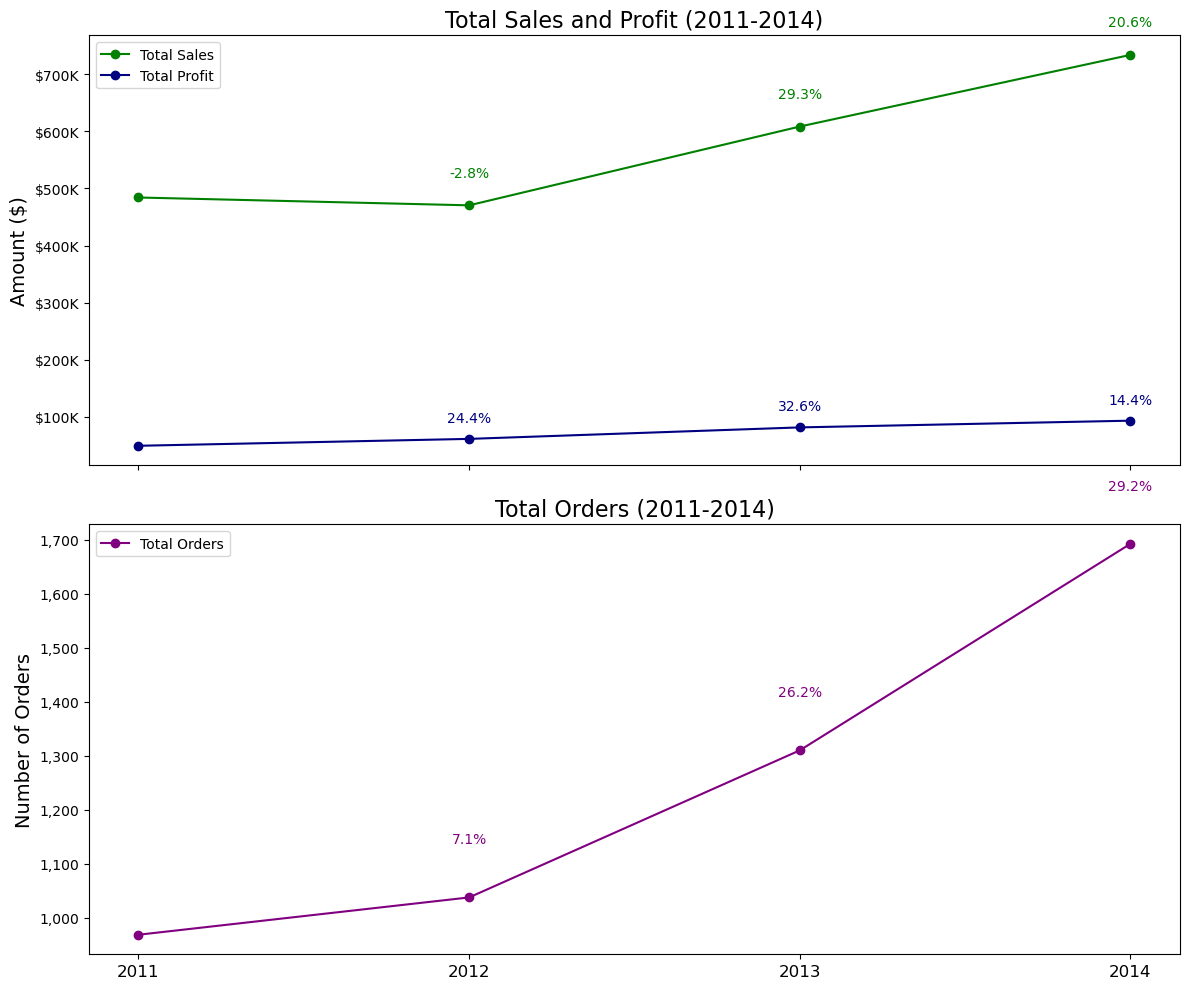

In [3]:
# Extract Year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by Year to aggregate metrics
yearly_summary = df.groupby('Year').agg(
    Orders=('Order ID', 'nunique'),  # Count of unique orders
    Sales=('Sales', 'sum'),          # Total sales
    Profit=('Profit', 'sum')         # Total profit
).reset_index()

# Calculate Year-over-Year growth percentages
yearly_summary['Sales Growth %'] = yearly_summary['Sales'].pct_change() * 100
yearly_summary['Profit Growth %'] = yearly_summary['Profit'].pct_change() * 100
yearly_summary['Order Growth %'] = yearly_summary['Orders'].pct_change() * 100

# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot Sales and Profit on the first subplot
ax1.plot(yearly_summary['Year'], yearly_summary['Sales'], label='Total Sales', marker='o', linestyle='-', color='green')
ax1.plot(yearly_summary['Year'], yearly_summary['Profit'], label='Total Profit', marker='o', linestyle='-', color='navy')
ax1.set_title('Total Sales and Profit (2011-2014)', fontsize=16)
ax1.set_ylabel('Amount ($)', fontsize=14)
ax1.legend()

# Format y-axis for Sales and Profit subplot (e.g., $600K, $500K)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x / 1_000):,}K'))

# Add growth labels with upward offset for Sales and Profit
for i in range(1, len(yearly_summary)):
    ax1.text(
        yearly_summary['Year'][i], yearly_summary['Sales'][i] + 50_000,  # Offset by 50,000
        f'{yearly_summary["Sales Growth %"][i]:.1f}%', 
        ha='center', color='green', fontsize=10
    )
    ax1.text(
        yearly_summary['Year'][i], yearly_summary['Profit'][i] + 30_000,  # Offset by 30,000
        f'{yearly_summary["Profit Growth %"][i]:.1f}%', 
        ha='center', color='navy', fontsize=10
    )

# Plot Total Orders on the second subplot
ax2.plot(yearly_summary['Year'], yearly_summary['Orders'], label='Total Orders', marker='o', linestyle='-', color='purple')
ax2.set_title('Total Orders (2011-2014)', fontsize=16)
ax2.set_ylabel('Number of Orders', fontsize=14)
ax2.legend()

# Format y-axis for Orders with commas
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add growth labels with upward offset for Orders
for i in range(1, len(yearly_summary)):
    ax2.text(
        yearly_summary['Year'][i], yearly_summary['Orders'][i] + 100,  # Offset by 100
        f'{yearly_summary["Order Growth %"][i]:.1f}%', 
        ha='center', color='purple', fontsize=10
    )

# Set x-ticks and labels for years
ax2.set_xticks(yearly_summary['Year'])
ax2.set_xticklabels(['2011', '2012', '2013', '2014'], fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()